<a href="https://colab.research.google.com/github/seanigens/IntroDataViz/blob/main/Practice_Activity_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [3]:
pip install palmerpenguins

In [5]:
# Code Here
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import ggplot, geom_point, aes, geom_boxplot
import seaborn as sns

In [13]:
penguin = load_penguins()

In [14]:
features = ['species', 'island', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
target = 'bill_depth_mm'

penguins = penguin.dropna(subset=features + [target])

penguins_dummies = pd.get_dummies(penguins[features])

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

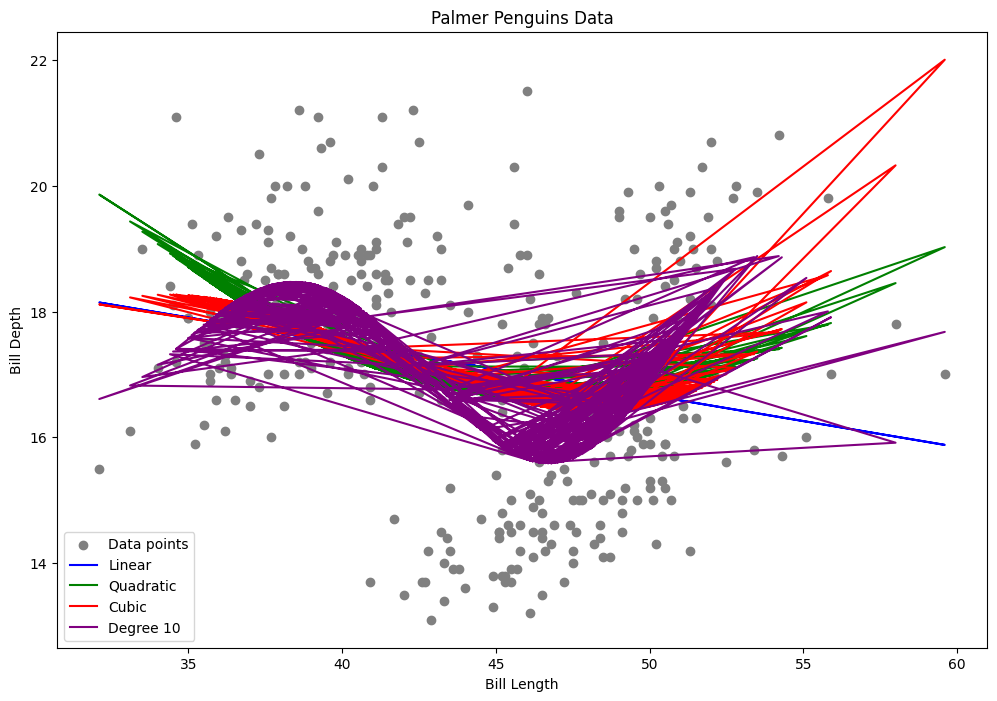

In [18]:
#Code Here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])
X = data['bill_length_mm'].values.reshape(-1, 1)
y = data['bill_depth_mm'].values

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly2, y)
y_pred_quad = lin_reg2.predict(X_poly2)

poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly3, y)
y_pred_cubic = lin_reg3.predict(X_poly3)

poly10 = PolynomialFeatures(degree=10)
X_poly10 = poly10.fit_transform(X)
lin_reg10 = LinearRegression()
lin_reg10.fit(X_poly10, y)
y_pred_poly10 = lin_reg10.predict(X_poly10)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='gray', label='Data points')
plt.plot(X, y_pred_lin, color='blue', label='Linear')
plt.plot(X, y_pred_quad, color='green', label='Quadratic')
plt.plot(X, y_pred_cubic, color='red', label='Cubic')
plt.plot(X, y_pred_poly10, color='purple', label='Degree 10')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('Palmer Penguins Data')
plt.legend()
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model is underfitting the data as it doesnt show much detail.

The 10 degree model appears to be overfitting the data as the line has too many nuances and doesnt follow the data properly.

The cubic model I think is the best because it follows the curve of the datapoints the best.